### Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Loading Dataset

In [37]:
dataset = pd.read_csv(r'E:\Hackathon-SmartNFT\data\nft_data.csv')

### Top 5 rows

In [38]:
dataset.head()

,Index,Name,Volume,Volume_USD,Market_Cap,Market_Cap_USD,Sales,Floor_Price,Floor_Price_USD,Average_Price,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio,Category,Website,Logo
0,0,basis.markets,27256.63,4.001818e+06,708.145455,103969.91560,366,39.50,5799.3900,74.471667,10933.930100,12,16,75.00,"Collectibles,Digital,Privilege",https://basis.markets/,https://content.solsea.io/files/thumbnail/1636...
1,1,Skeleton Crew Skulls,11381.25,1.670995e+06,106.656000,15659.23392,2075,0.67,98.3694,5.484940,805.298855,103,132,78.03,NaN,https://skeletoncrew.rip/,https://content.solsea.io/files/thumbnail/1633...
2,2,Flippies,6732.19,9.884201e+05,1663.863158,244288.38880,1504,0.80,117.4560,4.476190,657.194239,905,1638,55.25,NaN,https://www.flippies.art/,https://content.solsea.io/files/thumbnail/1632...
3,3,Meerkat Millionaires Country Club,3734.76,5.483375e+05,90.275000,13254.17550,395,3.79,556.4478,9.455089,1388.196109,19,23,82.61,NaN,https://meerkatmillionaires.club/,https://content.solsea.io/files/thumbnail/1632...
4,4,Stylish Studs,3191.15,4.685246e+05,165.000000,24225.30000,729,4.30,631.3260,4.377435,642.694984,28,50,56.00,NaN,https://stylishstuds.io,https://content.solsea.io/files/thumbnail/1632...


In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              592 non-null    int64  
 1   Name               592 non-null    object 
 2   Volume             592 non-null    float64
 3   Volume_USD         592 non-null    float64
 4   Market_Cap         592 non-null    float64
 5   Market_Cap_USD     592 non-null    float64
 6   Sales              592 non-null    int64  
 7   Floor_Price        544 non-null    float64
 8   Floor_Price_USD    544 non-null    float64
 9   Average_Price      592 non-null    float64
 10  Average_Price_USD  592 non-null    float64
 11  Owners             592 non-null    int64  
 12  Assets             592 non-null    int64  
 13  Owner_Asset_Ratio  543 non-null    float64
 14  Category           310 non-null    object 
 15  Website            481 non-null    object 
 16  Logo               591 non

In [40]:
dataset.describe()

,Index,Volume,Volume_USD,Market_Cap,Market_Cap_USD,Sales,Floor_Price,Floor_Price_USD,Average_Price,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio
count,592.000000,592.000000,5.920000e+02,592.000000,592.000000,592.000000,544.000000,544.000000,592.000000,592.000000,592.000000,592.000000,543.000000
mean,296.547297,197.548885,2.900413e+04,45.134817,6626.693810,164.491554,2.423015,355.747019,2.373566,348.486991,53.731419,116.694257,54.385672
std,172.520622,1283.031435,1.883747e+05,179.327166,26328.814578,451.321395,18.982148,2786.959001,15.035229,2207.472329,133.893752,251.598765,27.632770
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.020000,2.936400,0.000000,0.000000,0.000000,0.000000,0.260000
25%,147.750000,7.300000,1.071786e+03,0.000000,0.000000,11.000000,0.110000,16.150200,0.306029,44.931155,4.000000,10.000000,33.330000
50%,295.500000,18.595000,2.730118e+03,0.000000,0.000000,35.000000,0.300000,44.046000,0.720412,105.770928,15.000000,38.000000,57.250000
75%,444.250000,80.825000,1.186673e+04,21.841974,3206.838576,107.250000,1.000000,146.820000,1.596750,234.434771,44.000000,102.250000,72.845000
max,599.000000,27256.630000,4.001818e+06,2530.877143,371583.382100,5229.000000,400.000000,58728.000000,347.500000,51019.950000,2041.000000,3320.000000,100.000000


### Checking Null Values

In [41]:
checkIsNull = dataset.isnull().sum()
checkIsNull

Index                  0
Name                   0
Volume                 0
Volume_USD             0
Market_Cap             0
Market_Cap_USD         0
Sales                  0
Floor_Price           48
Floor_Price_USD       48
Average_Price          0
Average_Price_USD      0
Owners                 0
Assets                 0
Owner_Asset_Ratio     49
Category             282
Website              111
Logo                   1
dtype: int64

### Numerical Columns
Impute the missing values with "medians"

In [42]:
numerical_cols = dataset.select_dtypes(include=["float64", "int64"]).columns
imputer_num = SimpleImputer(strategy = 'median')
dataset[numerical_cols] = imputer_num.fit_transform(dataset[numerical_cols])

### Categorical Columns
Impute missing values with "Unknown"

In [43]:
categorical_cols = ['Name', 'Category', 'Website', 'Logo']
imputer_cat = SimpleImputer(strategy = 'constant', fill_value = 'Unknown')
dataset[categorical_cols] = imputer_cat.fit_transform(dataset[categorical_cols])

Verifying Missing values

In [44]:
print(dataset.isnull().sum())

Index                0
Name                 0
Volume               0
Volume_USD           0
Market_Cap           0
Market_Cap_USD       0
Sales                0
Floor_Price          0
Floor_Price_USD      0
Average_Price        0
Average_Price_USD    0
Owners               0
Assets               0
Owner_Asset_Ratio    0
Category             0
Website              0
Logo                 0
dtype: int64


### Encoding Categorical Variables

In [45]:
dataset.drop(['Index', 'Name', 'Website', 'Logo'], axis = 1, inplace = True)

In [46]:
categories = set()
dataset['Category'].apply(lambda x: categories.update(x.split(',')) if x != 'Unknown' else None)
categories = [cat.strip() for cat in categories if cat.strip()]

In [47]:
for cat in categories:
    dataset[f'Category_{cat}'] = dataset['Category'].apply(lambda x : 1 if cat in x else 0)

dataset.drop('Category', axis = 1, inplace = True)

In [48]:
dataset.head()

,Volume,Volume_USD,Market_Cap,Market_Cap_USD,Sales,Floor_Price,Floor_Price_USD,Average_Price,Average_Price_USD,Owners,...,Category_Ticket,Category_Art,Category_Artifact,Category_Performance,Category_PFP,Category_Drawing,Category_Collectibles,Category_2D,Category_Digital,Category_Trading Cards
0,27256.63,4.001818e+06,708.145455,103969.91560,366.0,39.50,5799.3900,74.471667,10933.930100,12.0,...,0,0,0,0,0,0,1,0,1,0
1,11381.25,1.670995e+06,106.656000,15659.23392,2075.0,0.67,98.3694,5.484940,805.298855,103.0,...,0,0,0,0,0,0,0,0,0,0
2,6732.19,9.884201e+05,1663.863158,244288.38880,1504.0,0.80,117.4560,4.476190,657.194239,905.0,...,0,0,0,0,0,0,0,0,0,0
3,3734.76,5.483375e+05,90.275000,13254.17550,395.0,3.79,556.4478,9.455089,1388.196109,19.0,...,0,0,0,0,0,0,0,0,0,0
4,3191.15,4.685246e+05,165.000000,24225.30000,729.0,4.30,631.3260,4.377435,642.694984,28.0,...,0,0,0,0,0,0,0,0,0,0


### Creating new features

In [49]:
dataset['Volume_per_Sale'] = dataset['Volume_USD'] / dataset['Sales']
dataset['Avg_Price_per_Asset'] = dataset['Average_Price_USD'] / dataset['Assets']
dataset['Market_Cap_to_Volume'] = dataset['Market_Cap_USD'] / dataset['Volume_USD']

# Handle infinities and NaNs
dataset.replace([np.inf, -np.inf], np.nan, inplace = True)
dataset.fillna(dataset.median(numeric_only = True), inplace = True)

In [50]:
dataset.drop(['Volume', 'Market_Cap', 'Floor_Price', 'Average_Price'], axis = 1, inplace = True)

### Outlier Handling

In [51]:
def cap_outliers(df, column):
    lower, upper = df[column].quantile([0.01, 0.99])
    df[column] = df[column].clip(lower, upper)
    return df

In [52]:
cols = ['Volume_USD', 'Market_Cap_USD', 'Floor_Price_USD', 'Sales', 'Owners', 'Assets']
for col in cols:
    dataset = cap_outliers(dataset, col)

In [107]:
dataset.columns

Index(['Volume_USD', 'Market_Cap_USD', 'Sales', 'Floor_Price_USD',
       'Average_Price_USD', 'Owners', 'Assets', 'Owner_Asset_Ratio',
       'Category_Physical', 'Category_Metaverse', 'Category_Image',
       'Category_Photography', 'Category_Painting', 'Category_Design',
       'Category_Trademark', 'Category_Music', 'Category_Print',
       'Category_Pixel Art', 'Category_P2E', 'Category_Music Theme',
       'Category_Sculpture', 'Category_3D', 'Category_Privilege',
       'Category_Street Art', 'Category_Graphics', 'Category_AI',
       'Category_Immaterial', 'Category_Video', 'Category_Picture',
       'Category_Audio', 'Category_Ticket', 'Category_Art',
       'Category_Artifact', 'Category_Performance', 'Category_PFP',
       'Category_Drawing', 'Category_Collectibles', 'Category_2D',
       'Category_Digital', 'Category_Trading Cards', 'Volume_per_Sale',
       'Avg_Price_per_Asset', 'Market_Cap_to_Volume'],
      dtype='object')

### Feature Scaling

In [53]:
# Log transform skewed numerical columns
skewed_cols = ['Volume_USD', 'Market_Cap_USD', 'Floor_Price_USD', 'Sales', 'Owners', 'Assets', 'Volume_per_Sale']
for col in skewed_cols:
    dataset[col] = np.log1p(dataset[col])

In [54]:
num_cols = [col for col in dataset.columns if not col.startswith('Category_') and col != "Market_Cap_USD"]
num_cols

['Volume_USD',
 'Sales',
 'Floor_Price_USD',
 'Average_Price_USD',
 'Owners',
 'Assets',
 'Owner_Asset_Ratio',
 'Volume_per_Sale',
 'Avg_Price_per_Asset',
 'Market_Cap_to_Volume']

In [55]:
scaler = StandardScaler()
dataset[num_cols] = scaler.fit_transform(dataset[num_cols])

### MODEL BUILDING

In [57]:
# Define features and Target value
X = dataset.drop('Market_Cap_USD', axis=1)
y = dataset['Market_Cap_USD']

In [58]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [80]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [101]:
def train_models(X_train, X_test, y_train, y_test):
    models = {
        "LinearRegression": LinearRegression(),
        "Random Forest": RandomForestRegressor(n_estimators = 200, random_state = 42),
        "Gradient Boosting": GradientBoostingRegressor(n_estimators = 200, random_state = 42),
        "XGBoost": XGBRegressor(n_estimators = 200, random_state = 42)
    }

    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results[name] = {
            "RMSE": rmse,
            "MAE": mae,
            "R²": r2
        }

    return results

In [105]:
res = train_models(X_train_scaled, X_test_scaled, y_train, y_test)
for name, metrics in res.items():
    print(f"Model Name: {name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("---------------------------")

Model Name: LinearRegression
RMSE: 12.922721234776388
MAE: 3.8176703903116604
R²: -8.297752188471366
---------------------------
Model Name: Random Forest
RMSE: 0.679974734165025
MAE: 0.1708464967711614
R²: 0.974257212794393
---------------------------
Model Name: Gradient Boosting
RMSE: 0.5762157760840007
MAE: 0.16911041449033679
R²: 0.9815141125713365
---------------------------
Model Name: XGBoost
RMSE: 0.7050499550075066
MAE: 0.1613018628371072
R²: 0.9723235875976208
---------------------------


In [81]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 0.5]
    }

In [84]:
rf_model = RandomForestRegressor(random_state = 42)
search = RandomizedSearchCV(
    rf_model,
    param_distributions = param_dist,
    n_iter = 10,
    cv = 5,
    scoring = 'r2',
    n_jobs = -1,
    random_state = 42
    )
search.fit(X_train_scaled, y_train)
model = search.best_estimator_ 

In [85]:
y_pred = model.predict(X_test_scaled)

In [88]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [106]:
print("Model Evaluation Metrics:")
print(f"RMSE: {rmse}")
print(f"MAE : {mae}")
print(f"R²  : {r2}")

Model Evaluation Metrics:
RMSE: 0.7102795610450086
MAE : 0.2768262619893402
R²  : 0.9719114933502442


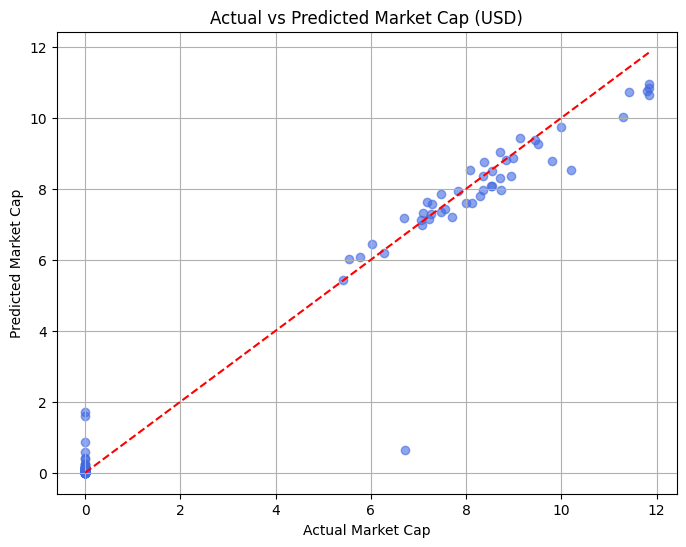

In [77]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Actual vs Predicted Market Cap (USD)")
plt.xlabel("Actual Market Cap")
plt.ylabel("Predicted Market Cap")
plt.grid(True)
plt.show()

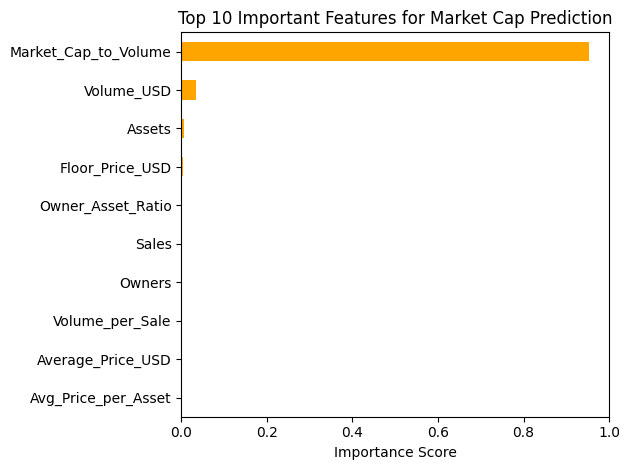

In [79]:
importances = best_model.feature_importances_
feat_names = X_train.columns
feat_df = pd.Series(importances, index=feat_names).sort_values(ascending=False)[:10]

feat_df.plot(kind='barh', color='orange')
plt.title("Top 10 Important Features for Market Cap Prediction")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()